In [33]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
DATADIR = './data/'

In [3]:
pstdf = pd.read_csv(DATADIR + 'pst_full_data.txt', sep='\t')
print(pstdf.head())

     Code subject         sleep  sr  BaselineFirst  female  age  night  \
0  S1-1-B      S1  Normal sleep   0              1       0   28    1.5   
1  S1-1-B      S1  Normal sleep   0              1       0   28    1.5   
2  S1-1-B      S1  Normal sleep   0              1       0   28    1.5   
3  S1-1-B      S1  Normal sleep   0              1       0   28    1.5   
4  S1-1-B      S1  Normal sleep   0              1       0   28    1.5   

   days_between_tests testtime  ... Actual wake time  Actual wake (%)  \
0                   7    13:51  ...              NaN              NaN   
1                   7    13:51  ...              NaN              NaN   
2                   7    13:51  ...              NaN              NaN   
3                   7    13:51  ...              NaN              NaN   
4                   7    13:51  ...              NaN              NaN   

  Sleep efficiency  Sleep latency get_up_easy well_rested KSS  SUSS kss_rt_ms  \
0              NaN            NaN  

In [15]:
print(pstdf['trialcode'].head())
print(pstdf['values.winletter'].head())
print(pstdf['values.selectedletter'].head())
print(pstdf['correct'].head())
print(pstdf['expressions.percA_ab'].head())
print(pstdf['days_between_tests'].head())
print(pstdf['trialnum'].head())
print(pstdf['kss_rt_ms'].head())

0    EF_phase1
1    CD_phase1
2    AB_phase1
3    AB_phase1
4    BA_phase1
Name: trialcode, dtype: object
0    E
1    C
2    A
3    A
4    A
Name: values.winletter, dtype: object
0    F
1    D
2    B
3    A
4    A
Name: values.selectedletter, dtype: object
0    0
1    0
2    0
3    1
4    1
Name: correct, dtype: int64
0         NaN
1         NaN
2    0.000000
3    0.500000
4    0.666667
Name: expressions.percA_ab, dtype: float64
0    7
1    7
2    7
3    7
4    7
Name: days_between_tests, dtype: int64
0     2
1     5
2     8
3    11
4    14
Name: trialnum, dtype: int64
0    167881
1    167881
2    167881
3    167881
4    167881
Name: kss_rt_ms, dtype: int64


In [13]:
print(pstdf['blockcode'].head())
print(pstdf['blockcode'].describe())
print(pstdf['blockcode'].unique())
print(pstdf['blockcode'].value_counts())

0    learningphase
1    learningphase
2    learningphase
3    learningphase
4    learningphase
Name: blockcode, dtype: object
count             13140
unique                7
top       learningphase
freq               3840
Name: blockcode, dtype: object
['learningphase' 'testphase' 'learningphase2' 'learningphase3'
 'learningphase4' 'learningphase5' 'learningphase6']
learningphase     3840
testphase         3840
learningphase2    2100
learningphase3    1260
learningphase4     960
learningphase5     600
learningphase6     540
Name: blockcode, dtype: int64


In [28]:
impdf = pstdf[['Code', 'subject', 'sleep', 'sr', 'BaselineFirst', 'female', 'age', 'blockcode', 'correct', 'response_time_ms', 'Time in bed', 'Assumed sleep', 'Actual sleep time', 'Actual sleep (%)', 'Actual wake time', 'Actual wake (%)', 'Sleep efficiency', 'Sleep latency', 'get_up_easy', 'well_rested', 'KSS', 'SUSS', 'kss_rt_ms', 'stress_rt_ms']]

impdf.head()

,Code,subject,sleep,sr,BaselineFirst,female,age,blockcode,correct,response_time_ms,...,Actual wake time,Actual wake (%),Sleep efficiency,Sleep latency,get_up_easy,well_rested,KSS,SUSS,kss_rt_ms,stress_rt_ms
0,S1-1-B,S1,Normal sleep,0,1,0,28,learningphase,0,1205,...,NaN,NaN,NaN,NaN,3.5,3.5,4,1,167881,7614
1,S1-1-B,S1,Normal sleep,0,1,0,28,learningphase,0,2007,...,NaN,NaN,NaN,NaN,3.5,3.5,4,1,167881,7614
2,S1-1-B,S1,Normal sleep,0,1,0,28,learningphase,0,1808,...,NaN,NaN,NaN,NaN,3.5,3.5,4,1,167881,7614
3,S1-1-B,S1,Normal sleep,0,1,0,28,learningphase,1,1234,...,NaN,NaN,NaN,NaN,3.5,3.5,4,1,167881,7614
4,S1-1-B,S1,Normal sleep,0,1,0,28,learningphase,1,755,...,NaN,NaN,NaN,NaN,3.5,3.5,4,1,167881,7614


In [29]:
impdf.shape

(13140, 24)

In [30]:
impdf.isna().sum()

Code                   0
subject                0
sleep                  0
sr                     0
BaselineFirst          0
female                 0
age                    0
blockcode              0
correct                0
response_time_ms       0
Time in bed            0
Assumed sleep          0
Actual sleep time    240
Actual sleep (%)     240
Actual wake time     240
Actual wake (%)      240
Sleep efficiency     240
Sleep latency        240
get_up_easy          300
well_rested          300
KSS                    0
SUSS                   0
kss_rt_ms              0
stress_rt_ms           0
dtype: int64

In [31]:
impdf.dropna(inplace=True)
impdf.shape

D:\software\miniconda3\envs\brsmenv\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(12600, 24)

<AxesSubplot:xlabel='KSS', ylabel='Count'>

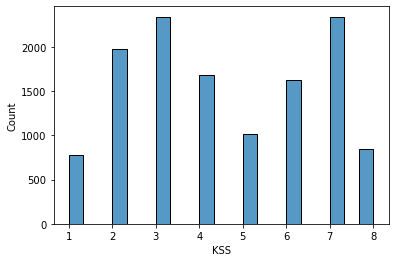

In [32]:
# hypothesis - gender and kss are related
sb.histplot(data=impdf, x='KSS')

In [42]:
femkss = impdf.loc[impdf['female']==1]['KSS'].to_numpy()
malkss = impdf.loc[impdf['female']==0]['KSS'].to_numpy()


(array([  3.,  16.,  67., 145., 213., 259., 176.,  84.,  33.,   4.]),
 array([-0.129 , -0.0672, -0.0054,  0.0564,  0.1182,  0.18  ,  0.2418,
         0.3036,  0.3654,  0.4272,  0.489 ]),
 <BarContainer object of 10 artists>)

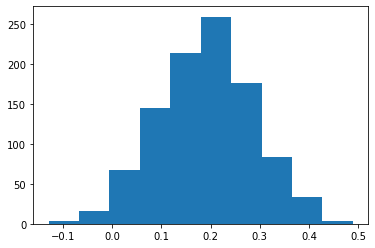

In [43]:
meandiff = np.zeros(1000)
for i in range(1000):
    var1 = np.random.choice(femkss, 1000)
    var2 = np.random.choice(malkss, 1000)
    meandiff[i] = np.mean(var1) - np.mean(var2)

plt.hist(meandiff)

In [44]:
stats.wilcoxon(meandiff)

WilcoxonResult(statistic=1055.5, pvalue=1.674006168423175e-163)

In [45]:
stats.wilcoxon(meandiff, alternative='greater')

WilcoxonResult(statistic=497445.5, pvalue=8.370030842115875e-164)

In [ ]:
# hypothesis - 